
##  Manipulating fireball network data in VESPA

Most fireball networks use the ecsv format to distribute their observations.

Those are typically meteor paths measured on the sky in the local frame of the observer.

Such files can be read in TOPCAT, and are supported in astropy (https://docs.astropy.org/en/stable/io/ascii/ecsv.html). The objective here is to convert such files, which provide a path in local coordinates, to a common celestial coordinate frame and compare them to retrieve the trajectory of the impactor by triangulation. We're playing here with an arbitrary file from an actual observation. 

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from astropy.table import Table
import astropy.units as u
import astropy.coordinates as coord
from astropy.io import ascii
from astropy.time import Time

### 1- Reading and plotting the data

In [2]:
# arbitrary example
filename = "data/36_2014-11-25_152058_DSC_0594-G_DN141125_01_2018-04-26_163106_martin_nocomment.ecsv"

In [3]:
# read it with astropy
obs=Table.read(filename) 

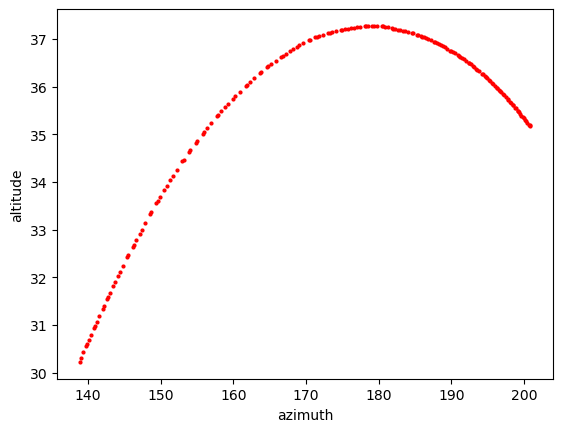

In [4]:
# plot alt-az 
p = plt.plot(obs['azimuth'], obs['altitude'], 'ro', ms=2)
p=plt.xlabel('azimuth')
p=plt.ylabel('altitude')

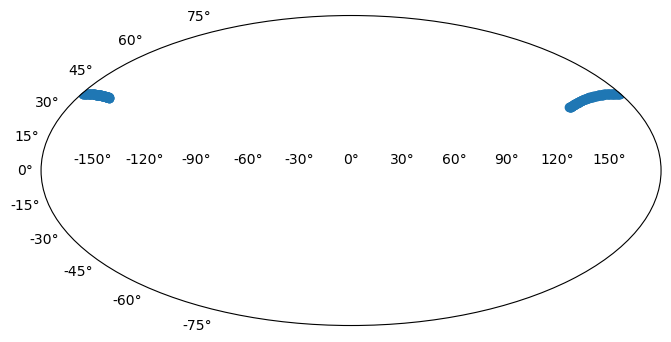

In [5]:
# plot as a local celestial map — not a very pretty one...

fig = plt.figure(figsize=(8,6))
# Plot in Alt-Az, as observed
ax = fig.add_subplot(111, projection="mollweide")
az = coord.Angle(obs['azimuth']* u.deg)
az = az.wrap_at(180*u.degree) # required to fit map
alt = coord.Angle(obs['altitude']* u.deg)
ax.scatter(az.radian, alt.radian)

To plot this in TOPCAT, just read the file and open a SkyPlot window

![TOPCAT_fireball](data/TOPCAT_fireball.png)

TOPCAT provides the equivalent instructions for Stilts: 

  `topcat -stilts plot2sky \
   xpix=847 ypix=444 \
   sex=false crowd=2.34 \
   clon=194.1 clat=21.7 radius= \
   auxmin=-35069 auxmax=121600000 \
   auxvisible=true auxlabel='flux_dash_V / adu / s' \
   legend=true \
   layer=Mark \
      in='/Data4/Ai/Le Monde/Abstracts/Fireballs 2022/36_2014-11-25_152058_DSC_0594-G_DN141125_01_2018-04-26_163106_martin_nocomment.ecsv' \
      lon=azimuth lat=altitude aux=flux_dash_V \
      shading=aux size=3 \
      leglabel='13: All' `

### 2- Converting to RA-Dec celestial coordinates

In [6]:
# Try at parsing values from header, TBC
data = ascii.read(filename) 
import yaml
#with open(filename) as f:
# data = yaml.safe_load(f)
# pipo = data['# meta']['# - {obs_latitude']
# print(pipo)

In [7]:
# coordinates of observer retrieved manually from the ecsv header

lat = -30.6607733333
lon = 134.186036667
obstime = Time('2014-11-25T15:21:10.500')
location  = coord.EarthLocation(lat=lat*u.deg, lon=lon*u.deg, height=149.1*u.m)

In [8]:
Caltaz = coord.SkyCoord(coord.AltAz(obstime=obstime,az=az,alt=alt,location=location))
object_radec = Caltaz.transform_to('icrs')

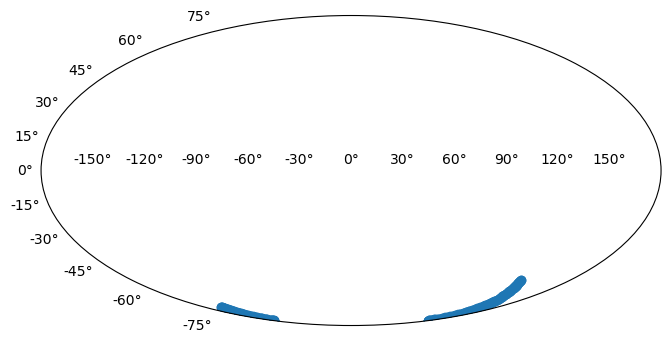

In [9]:
# plot as a celestial map in RA-Dec

fig2 = plt.figure(figsize=(8,6))
# still not pretty... but this time in RA-Dec
ax = fig2.add_subplot(111, projection="mollweide")
RA = coord.Angle(object_radec.ra)
RA = az.wrap_at(180*u.degree) # required to fit map
Dec = coord.Angle(object_radec.dec)
ax.scatter(RA.radian, Dec.radian)

### 3- Plotting the trajectory in Aladin

In [10]:
# save as VOTable
#Caltaz.to_table().write(output="pathAltAz.vot", format="votable",overwrite="True")
# RA-Dec table - you probably want to also save the time as a column, and observer location for triangulation
object_radec.to_table().write(output="path.vot", format="votable",overwrite="True")

To plot this in Aladin, just read the file 

![Aladin_fireballs](data/Aladin_fireballs.png)

### 4- Plotting trajectory in Aladin Lite

In [11]:
# It is possible to install Aladin Lite in a Jupyter notebook
# see examples here: https://github.com/cds-astro/ipyaladin/tree/master/examples

from ipyaladin import Aladin


ModuleNotFoundError: No module named 'ipyaladin'